# **Insper - Eletromagnetismo e Ondulatória** #


**Modelagem Projeto Eletromag. (Parte 2 do Projeto)**

In [23]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import *

In [24]:
R1 = 1
R2 = 1
L1 = 10e-3
L2 = L1
C1 = 100e-6
C2 = C1
K = 0.2
M = (sqrt(L1*L2))*K

In [25]:
f = 60*10**3
W = 2*pi*f
Ufonte = 110
XL1 = 1j * W * L1
XL2 = 1j * W * L2
XM = 1j * W * M
XC1 = 1/(1j * W * C1)
XC2 = 1/(1j * W * C2)

*Modelo Paralelo*

In [26]:

def CalcularParalelo(Uf, Rc):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+(Rc*XC2/(Rc+XC2))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [27]:
Rcarga = 6
i1, i2 = CalcularParalelo(Ufonte, Rcarga)

print('No modelo em paralelo, com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.2f A' %np.abs(i1))
print('i2 (eficaz) = %.2f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %Ufonte)
print('V2 (eficaz): %.2f V' %(np.abs(i2*Rcarga)))

print('Relação N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Relação i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Relação V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))





No modelo em paralelo, com resistor na saída de 6.00 Ω:
i1 (eficaz) = 0.03 A
i2 (eficaz) = 0.01 A
V1 (eficaz): 110.00 V
V2 (eficaz): 0.04 V
Relação N1/N2: 1.00
Relação i2/i1: 0.20
Relação V1/V2: 3015.88


*Modelo em Série*

In [28]:
def CalcularEmSerie(Uf, Rc):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+XC2+Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [29]:
Rcarga = 5
i1, i2 = CalcularEmSerie(Ufonte, Rcarga)

print('No modelo em série, com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.2f A' %np.abs(i1))
print('i2 (eficaz) = %.2f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %Ufonte)
print('V2 (eficaz): %.2f V' %(np.abs(i2*Rcarga)))

print('Relação N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Relação i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Relação V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))





No modelo em série, com resistor na saída de 5.00 Ω:
i1 (eficaz) = 0.03 A
i2 (eficaz) = 0.01 A
V1 (eficaz): 110.00 V
V2 (eficaz): 0.03 V
Relação N1/N2: 1.00
Relação i2/i1: 0.20
Relação V1/V2: 3619.07


**Simulação do Circuito (Parte 3 do Projeto)**

In [30]:
def calcular_frequencia_ressonancia(L, C):
    return 1 / (2 * pi * np.sqrt(L * C))

fR = calcular_frequencia_ressonancia(L1, C1)
print('Frequência de ressonância do primário: %.2f Hz' %fR)

Frequência de ressonância do primário: 159.15 Hz


In [31]:
Usaida = i2 * Rcarga

def calcular_eficiencia(V1, I1, V2, I2):
    i2 = I2
    i1 = I1
    P_saida = np.real(0.5 * (V2/sqrt(2)) * i2.conjugate())
    P_entrada = np.real(0.5 * (V1/sqrt(2)) * i1.conjugate())
    eficiencia = P_saida / P_entrada

    return eficiencia

Ef = calcular_eficiencia(Ufonte, i1, Usaida, i2)
print('Eficiência do sistema: %.4f' %Ef)

Eficiência do sistema: 0.1613


In [32]:
def calcular_resistencia_pelicular(R_DC, f):
    return R_DC + (R_DC / (100 * 1e3))*f

R_DC = 0.1

Rp = calcular_resistencia_pelicular(R_DC, f)
print('Resistência pelicular: %.3f Ω' %Rp)

Resistência pelicular: 0.160 Ω


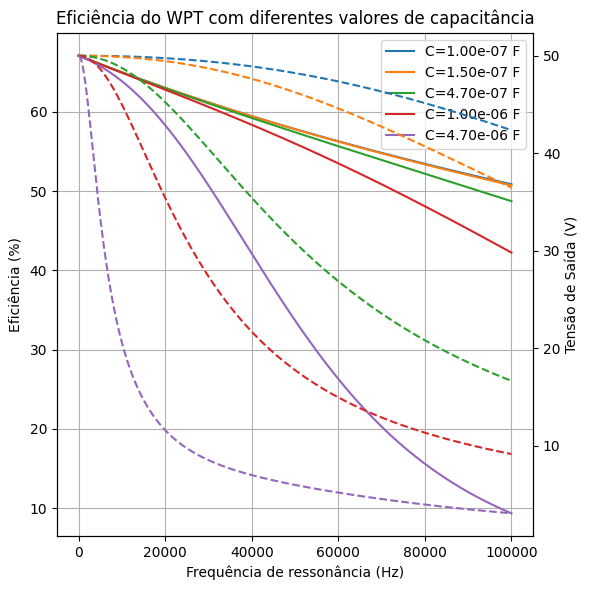

In [33]:
# Simulação para diferentes valores de C em paralelo.

C_values = [1e-7, 1.5e-7, 4.7e-7, 1e-6, 4.7e-6]
Ufonte = 10
R_DC = 0.1
K = 0.2

def calcular_resistencia_pelicular(R_DC, f):
    return R_DC + (R_DC / 100e3)*f

def calcular_eficiencia(V1, I1, V2, I2):
    i2 = I2
    i1 = I1
    P_saida = np.real(0.5 * V2 * i2.conjugate())
    P_entrada = np.real(0.5 * V1 * i1.conjugate())
    eficiencia = P_saida / P_entrada

    return eficiencia

def simular_eficiencia(C_values, R_DC, V1):
    fig, ax1 = plt.subplots(figsize=(6, 6))
                            
    ax2 = ax1.twinx()
    ax1.set_xlabel('Frequência de ressonância (Hz)')
    ax1.set_ylabel('Eficiência (%)')
    ax2.set_ylabel('Tensão de Saída (V)')
    
    for C in C_values:
        eficiencia = []
        tensao_saida = []
        frequencias = []
        freq_max = 100e3

        for f in np.linspace(1, freq_max+1, 1000):
            R_f = calcular_resistencia_pelicular(R_DC, f)
            
            # Redefinindo os parâmetros do circuito
            W = 2 * pi * f
            L = 1/(W**2 * C)
            M = L*K #(sqrt(L**2))*K
            XL1 = 1j * W * L
            XL2 = XL1
            XM = 1j * W * M
            XC1 = 1/(1j * W * C)
            XC2 = XC1

            def CalcularParalelo(Uf, Rc):
                Z=np.array([[R_f+XL1+XC1, -XM],[-XM, XL2+R_f+(Rc*XC2/(Rc+XC2))]])
                V=np.array([Uf,0])
                i=np.linalg.solve(Z, V)
                return i[0], i[1]

            I1_f, I2_f = CalcularParalelo(Ufonte, 5)
            V2_f = 1j * W * M * I1_f
            
            eficiencia_f = calcular_eficiencia(V1, I1_f, V2_f, I2_f)
            eficiencia.append(eficiencia_f * 100)
            tensao_saida.append(np.abs(V2_f))
            frequencias.append(f)

        ax1.plot(frequencias, eficiencia, label=f'C={C:.2e} F')
        ax2.plot(frequencias, tensao_saida, linestyle='--')

    ax1.set_title('Eficiência do WPT com diferentes valores de capacitância')
    ax1.legend()
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

simular_eficiencia(C_values, R_DC, Ufonte)